In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

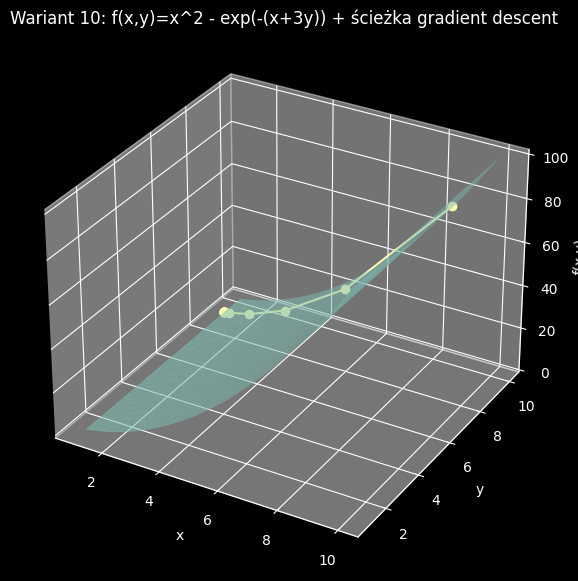

In [4]:
def f(x, y):
    return x**2 - np.exp(-(x + 3*y))

def grad_f(x, y):
    g = np.exp(-(x + 3*y))
    dfdx = 2*x + g
    dfdy = 3*g
    return np.array([dfdx, dfdy])

def gradient_descent_box(x0, y0, lr=0.1, steps=200, x_min=1, x_max=10, y_min=1, y_max=10):
    x, y = float(x0), float(y0)
    path = [(x, y, f(x, y))]
    for _ in range(steps):
        dfdx, dfdy = grad_f(x, y)
        x = x - lr * dfdx
        y = y - lr * dfdy

        x = float(np.clip(x, x_min, x_max))
        y = float(np.clip(y, y_min, y_max))

        path.append((x, y, f(x, y)))
    return np.array(path)

path = gradient_descent_box(x0=9, y0=9, lr=0.2, steps=80)
path[-1], path[:3]

x = np.linspace(1, 10, 120)
y = np.linspace(1, 10, 120)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.6)
ax.plot(path[:,0], path[:,1], path[:,2], marker="o")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Wariant 10: f(x,y)=x^2 - exp(-(x+3y)) + ścieżka gradient descent")
plt.show()

In [6]:
def elu(Z, alpha=1.0):
    return np.where(Z > 0, Z, alpha * (np.exp(Z) - 1))

def elu_backward(dA, Z, alpha=1.0):
    d_elu = np.where(Z > 0, 1.0, alpha * np.exp(Z))
    return dA * d_elu

def init_params(seed=0):
    rng = np.random.default_rng(seed)
    W1 = rng.normal(0, 0.1, size=(2, 2))
    b1 = rng.normal(0, 0.1, size=(2, 1))
    W2 = rng.normal(0, 0.1, size=(1, 2))
    b2 = rng.normal(0, 0.1, size=(1, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def forward(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    Z1 = W1 @ X + b1
    A1 = elu(Z1)
    Z2 = W2 @ A1 + b2
    A2 = elu(Z2)
    cache = {"X": X, "Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def mse(y_hat, y):
    return np.mean((y_hat - y)**2)

def backward(y_hat, y, cache, params):
    m = y.shape[1]
    W2 = params["W2"]

    dA2 = (2.0 / m) * (y_hat - y)
    dZ2 = elu_backward(dA2, cache["Z2"])

    dW2 = (dZ2 @ cache["A1"].T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T @ dZ2
    dZ1 = elu_backward(dA1, cache["Z1"])

    dW1 = (dZ1 @ cache["X"].T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

X = np.array([[1, 2, 3, 4],
              [3, 4, 5, 6]], dtype=float)

y = np.array([[2, 4, 6, 8]], dtype=float)

params = init_params(seed=1)
y_hat, cache = forward(X, params)
loss = mse(y_hat, y)
grads = backward(y_hat, y, cache, params)

loss, {k: v.shape for k,v in grads.items()}


(np.float64(30.18804758007845),
 {'dW1': (2, 2), 'db1': (2, 1), 'dW2': (1, 2), 'db2': (1, 1)})